In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/Users/kimjiho/Desktop/Spring2025_Last_Semester/CSE351/cse351_Course_Project/titanic/train.csv")
test = pd.read_csv("/Users/kimjiho/Desktop/Spring2025_Last_Semester/CSE351/cse351_Course_Project/titanic/test.csv")

I first make a copy to avoid damaging the original data

In [4]:
#EDA
print(train.shape)
copyTrain = train.copy()
train.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check if there are any NaN values in the data, and if there are, check how they are distributed and how many there are.

In [5]:
idData = train["PassengerId"].unique()
pclassData = train["Pclass"].unique()
nameData = train["Name"].unique()
sexData = train["Sex"].unique()
embarkedData = train["Embarked"].unique()
survivedData = train["Survived"].unique()
ageData = train["Age"].unique()
ticketData = train["Ticket"].unique()
parchData = train["Parch"].unique()
fareData = train["Fare"].unique()
sibSpData = train["SibSp"].unique()
cabinData = train["Cabin"].unique()
checkNanId = [name for name in idData if pd.isna(name)]
checkNanName = [name for name in nameData if pd.isna(name)]
checkNanSex = [name for name in sexData if pd.isna(name)]
checkNanEmbarked=[name for name in embarkedData if pd.isna(name)]
checkNanSurvive=[name for name in survivedData if pd.isna(name)]
checkNanAge=[name for name in ageData if pd.isna(name)]
checkNanTicket=[name for name in ticketData if pd.isna(name)]
checkNanParch=[name for name in parchData if pd.isna(name)]
checkNanFare=[name for name in fareData if pd.isna(name)]
checkNanSibSp=[name for name in sibSpData if pd.isna(name)]
checkNanCabin=[name for name in cabinData if pd.isna(name)]
checkNanPclass=[name for name in pclassData if pd.isna(name)]
print(f"Check Id: {checkNanId}\ncheckNanName: {checkNanName}\ncheckNanSex: {checkNanSex}\ncheckNanEmbarked: {checkNanEmbarked}\ncheckNanSurvive: {checkNanSurvive}\ncheckNanAge: {checkNanAge}\ncheckNanTicket: {checkNanTicket}\ncheckNanParch: {checkNanParch}\ncheckNanFare: {checkNanFare}")
print(f"Check ParchData: {checkNanSibSp}\ncheck fare Data: {checkNanCabin}\ncheck P class Data: {checkNanPclass}")

Check Id: []
checkNanName: []
checkNanSex: []
checkNanEmbarked: [nan]
checkNanSurvive: []
checkNanAge: [nan]
checkNanTicket: []
checkNanParch: []
checkNanFare: []
Check ParchData: []
check fare Data: [nan]
check P class Data: []


In [6]:
nanEmbarkedRow = train[train["Embarked"].isna()]
nanAgeRow = train[train["Age"].isna()]
nanCabinRow = train[train["Cabin"].isna()]
print(f"Numbers of nan Data from Embarked: {len(nanEmbarkedRow)}")
print(f"Numbers of nan Data from Age: {len(nanAgeRow)}")
print(f"Numbers of nan Data from Cabin: {len(nanCabinRow)}")
print(f"The proportion of NaN ages in the entire dataset: {len(nanAgeRow)/len(train)}")
print(f"The proportion of NaN Cabin in the entire dataset: {len(nanCabinRow)/len(train)}")

Numbers of nan Data from Embarked: 2
Numbers of nan Data from Age: 177
Numbers of nan Data from Cabin: 687
The proportion of NaN ages in the entire dataset: 0.19865319865319866
The proportion of NaN Cabin in the entire dataset: 0.7710437710437711


Since there are only 2 missing values out of 891 in the embarked data, I drop them to remove the NaN values.

In [7]:
copyTrain.dropna(subset=["Embarked"], inplace=True)
nanEmbarkedRow = copyTrain[copyTrain["Embarked"].isna()]
print(f"Numbers of nan Data from Embarked: {len(nanEmbarkedRow)}") # check if there is missing nan value in Embarked column

Numbers of nan Data from Embarked: 0


In [8]:
firstQ = train["Age"].quantile(0.25)
thirdQ = train["Age"].quantile(0.75)
IQR = thirdQ - firstQ
lowerBound = firstQ - 1.5 * IQR
upperBound = thirdQ + 1.5 * IQR
outliers = train[(train["Age"] < lowerBound) | (train["Age"] > upperBound)]
print(len(outliers))
print(len(train))
print(len(outliers)/len(train))

11
891
0.012345679012345678


In [9]:
outliers.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


Only groups of people at older ages, which account for only about 0.01235, are included as outliers, but since data on elderly people may be needed when analyzing, I considered not dropping them. On the other hand, 77.1% of the cabin data is NaN, and since social status, such as seat importance, can be substituted by Pclass

In [10]:
noCabinData = copyTrain.drop(columns=["Cabin"])

As done in Assignment 3, I predict the age values through linear regression and fill in the nan age values.

In [11]:
from sklearn.linear_model import LinearRegression

First, I collect only the non-NaN age data to use for training, and then make predictions.

In [12]:
dataProcess = noCabinData.dropna(subset=["Age"], inplace=True)
checkNanAgeRow = noCabinData[noCabinData["Age"].isna()]
print(checkNanAgeRow)
len(noCabinData)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


712

First, before training, I check the Pearson correlation and Spearman correlation of the numerical data unrelated to age, as learned in class. Then, I remove all the features that have low correlation values.

In [13]:
forCorr = noCabinData.drop(columns=["Name","Sex","Ticket","Embarked"])
agePairsP = forCorr.corr()["Age"].sort_values()
print(agePairsP)

Pclass        -0.365902
SibSp         -0.307351
Parch         -0.187896
Survived      -0.082446
PassengerId    0.033681
Fare           0.093143
Age            1.000000
Name: Age, dtype: float64


In [14]:
agePairsS = forCorr.corr(method="spearman")["Age"].sort_values()
print(agePairsS)

Pclass        -0.358490
Parch         -0.253183
SibSp         -0.180426
Survived      -0.057032
PassengerId    0.039604
Fare           0.130632
Age            1.000000
Name: Age, dtype: float64


Features with a pearson and spearman correlation value below 0.1 absolute value are removed for training. I also remove columns that cannot be converted to float values. Also, according to the correlation, I figured out that there is high negative relationship between age and pclass.

In [15]:
xTrain = noCabinData.drop(columns=["PassengerId","Name","Age","Ticket","Survived","Sex","Embarked"])
yTrain = noCabinData["Age"]

In [16]:
xTest = nanAgeRow.drop(columns=["PassengerId","Name","Age","Ticket","Survived","Sex","Embarked","Cabin"])

In [17]:
model = LinearRegression(positive=True)
model.fit(xTrain, yTrain)

LinearRegression(positive=True)

In [18]:
prediction = model.predict(xTest)
print(len(prediction))

177


Since the prediction is finished, I replace the age column of the data frame, where the age values were originally NaN, with the predicted values.

In [19]:
nanAgeRow.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [20]:
nanAgeRow.loc[:, "Age"] = prediction

In [21]:
print(nanAgeRow[nanAgeRow["Age"].isna()])
print(len(nanAgeRow))
toCombine = nanAgeRow.drop(columns=["Cabin"])
print(toCombine[toCombine["Age"].isna()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
177
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [22]:
print(noCabinData[noCabinData["Age"].isna()])
print(len(noCabinData))

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []
712


In [23]:
newTitanicData = pd.concat([toCombine, noCabinData], axis=0, ignore_index=True)

I combine the data frame where the NaN values in age have been filled with the predicted ages and the data frame that originally had no NaN values to create the final data frame with no NaN values. Since the outliers consist only of a small number of elderly individuals who I think could be important, I did not remove them separately.

In [24]:
print(newTitanicData.isna().any().any())

False


In [25]:
print(len(newTitanicData))

889


To understand the overall relationship between Pclass and other numerical variables, I calculate the correlation. I mainly used Pearson correlation to determine the correlation.

In [26]:
corrData = newTitanicData.drop(columns=["Name","Sex","Ticket","Embarked"])
corrM = corrData.corr()
print(corrM)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030753 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.071935 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.335479  0.081656  0.016824   
Age             0.030753 -0.071935 -0.335479  1.000000 -0.225917 -0.174913   
SibSp          -0.057686 -0.034040  0.081656 -0.225917  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.174913  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.097677  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.097677  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


As done above, I remove all duplicate values, and this time, instead of age, I check which column has the highest correlation with Pclass.

In [27]:
pclassPairs = corrData.corr()["Pclass"].abs().sort_values()

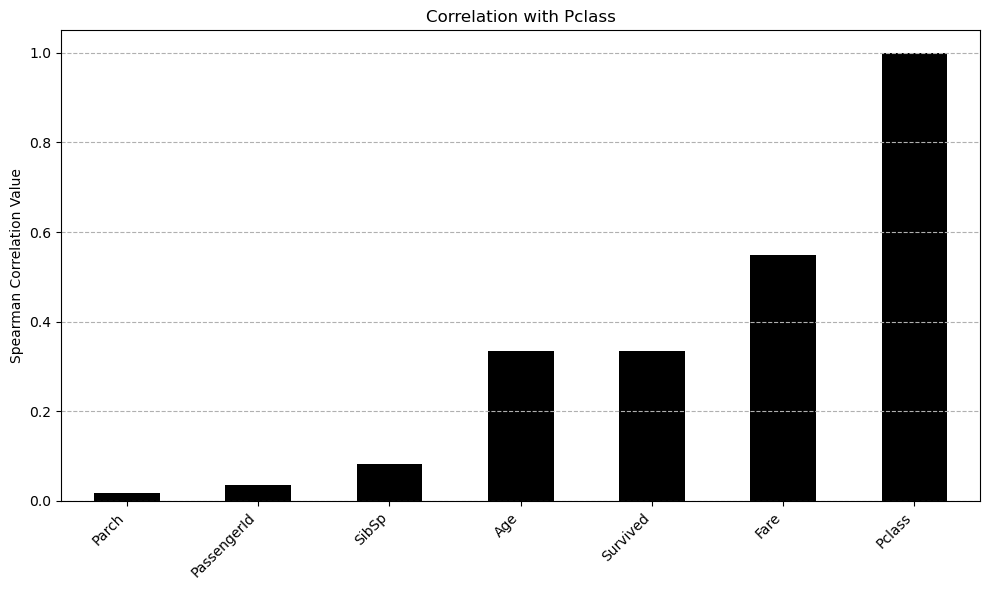

In [28]:
plt.figure(figsize=(10,6))
pclassPairs.plot(kind="bar", color= "black")
plt.title("Correlation with Pclass")
plt.ylabel("Spearman Correlation Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y",linestyle = "--")
plt.tight_layout()
plt.show()

Naturally, Pclass and Fare, the amount paid for the ticket are highly related. And we can see that Pclass has a considerable impact on the survival rate.

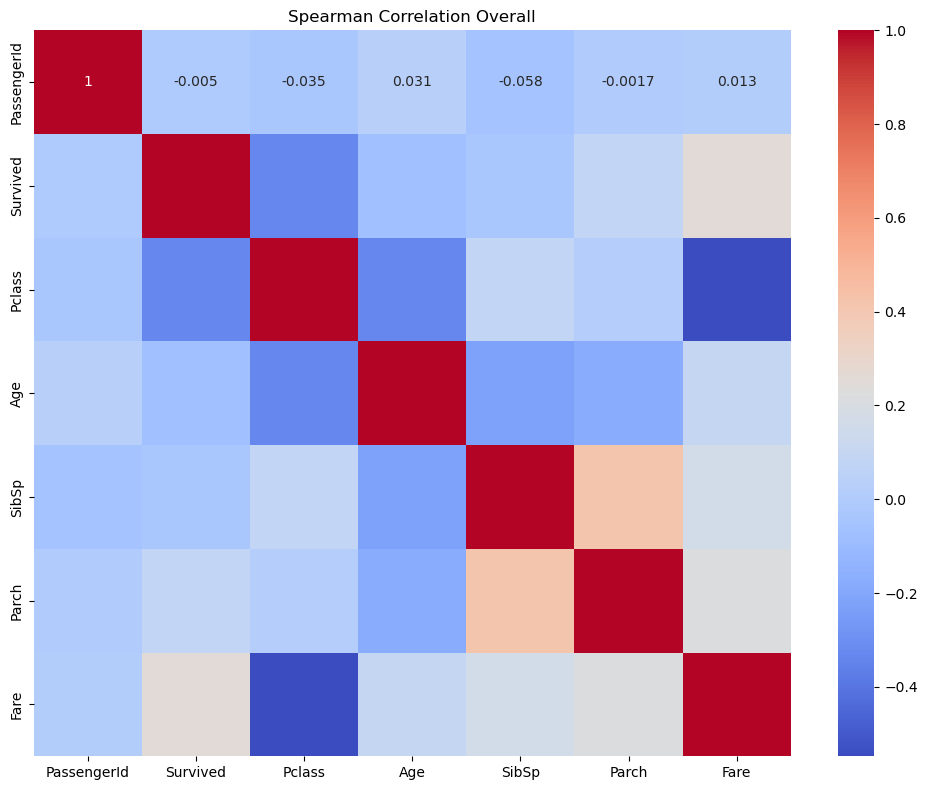

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(corrM, annot=True, cmap = "coolwarm")
plt.title("Spearman Correlation Overall")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sex Ratio per Ticket class')

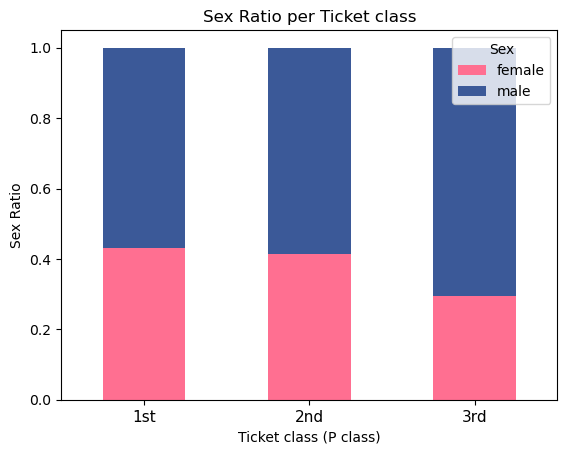

In [30]:
ct = pd.crosstab(newTitanicData["Pclass"], newTitanicData["Sex"], normalize='index')
spclass = ct.plot(kind="bar", stacked=True, color=["#FF6F91","#3B5998"])
spclass.set_xticklabels(["1st", "2nd", "3rd"], rotation=0,fontsize=11)
spclass.set_xlabel("Ticket class (P class)")
spclass.set_ylabel("Sex Ratio")
spclass.set_title("Sex Ratio per Ticket class")

In percentages, from which embarkation region passengers were most likely to board in the higher class.

Text(0.5, 1.0, 'Embarked Ratio per Ticket class')

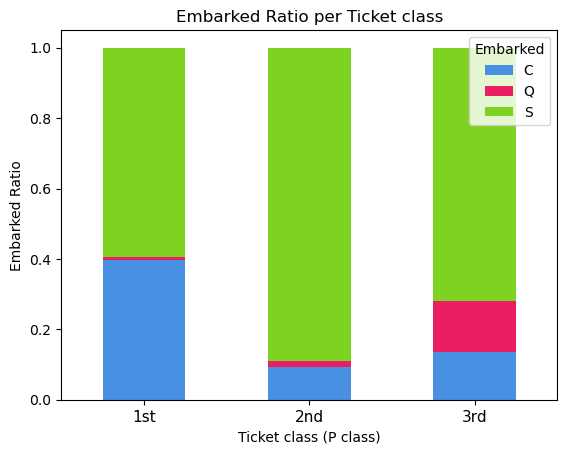

In [31]:
ct = pd.crosstab(newTitanicData["Pclass"], newTitanicData["Embarked"], normalize='index')
spclass = ct.plot(kind="bar", stacked=True, color=["#4A90E2","#E91E63","#7ED321"])
spclass.set_xticklabels(["1st", "2nd", "3rd"], rotation=0,fontsize=11)
spclass.set_xlabel("Ticket class (P class)")
spclass.set_ylabel("Embarked Ratio")
spclass.set_title("Embarked Ratio per Ticket class")

It can be seen that in Cherbourg, people embarked regardless of class. In Southampton, it can be seen that many wealthy people lived there, while in Queenstown, most of the people did not spend money to buy expensive ticket.

In [32]:
survivedPairs = corrData.corr()["Survived"].abs().sort_values() #From now on, I examine the relationship between survival and the other columns.

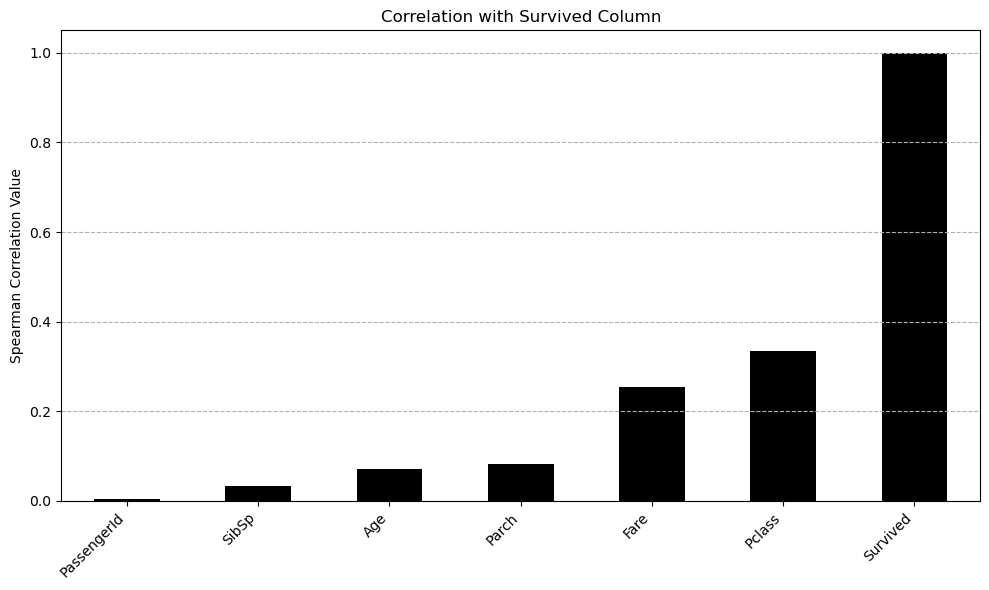

In [33]:
plt.figure(figsize=(10,6))
survivedPairs.plot(kind="bar", color= "black")
plt.title("Correlation with Survived Column")
plt.ylabel("Spearman Correlation Value")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y",linestyle = "--")
plt.tight_layout()
plt.show()

We can directly see from which embarkation region the most passengers died or survived.
It can be seen that the ticket price, which is connected to their wealth, is highly related to the passengers' status and survival rate.

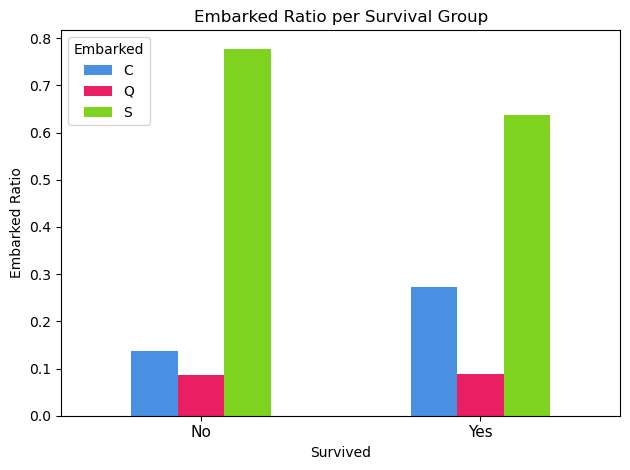

In [34]:
ctE = pd.crosstab(newTitanicData["Survived"],newTitanicData["Embarked"],normalize="index")
graphing = ctE.plot(kind="bar",stacked=False,color=["#4A90E2", "#E91E63", "#7ED321"])

graphing.set_xticklabels(["No", "Yes"], rotation=0, fontsize=11)
graphing.set_xlabel("Survived")
graphing.set_ylabel("Embarked Ratio")
graphing.set_title("Embarked Ratio per Survival Group")
graphing.legend(title="Embarked")

plt.tight_layout()
plt.show()

People from Southampton, who seem to have boarded the most, died the most, and it can be seen that people from Cherbourg, who mostly boarded in third class, had the highest survival rate.

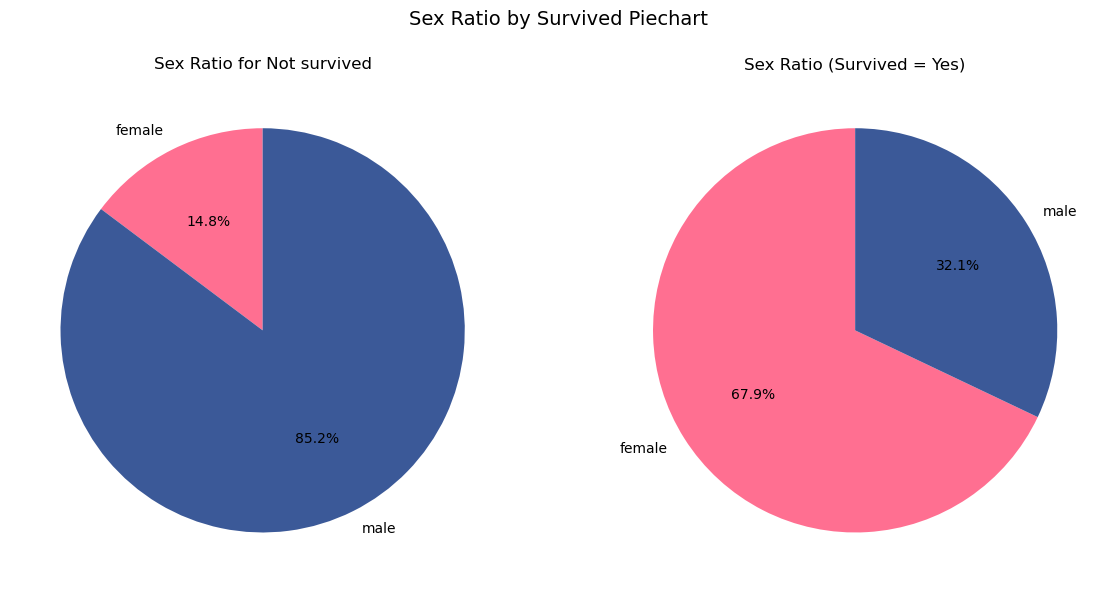

In [35]:
ctS = pd.crosstab(newTitanicData["Survived"], newTitanicData["Sex"], normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ["#FF6F91", "#3B5998"]
ctS.loc[0].plot(kind="pie", autopct="%1.1f%%",labels=ctS.columns, colors=colors, startangle=90,ax=axes[0])
axes[0].set_title("Sex Ratio for Not survived")
axes[0].set_ylabel("")

ctS.loc[1].plot(kind="pie",autopct="%1.1f%%",labels=ctS.columns,colors=colors,startangle=90,ax=axes[1])
axes[1].set_title("Sex Ratio (Survived = Yes)")
axes[1].set_ylabel("")

plt.suptitle("Sex Ratio by Survived Piechart", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

It can be seen that more men died than women.
It is presumed that women were given priority during escaping from the Titanic, which may explain their higher survival rate.

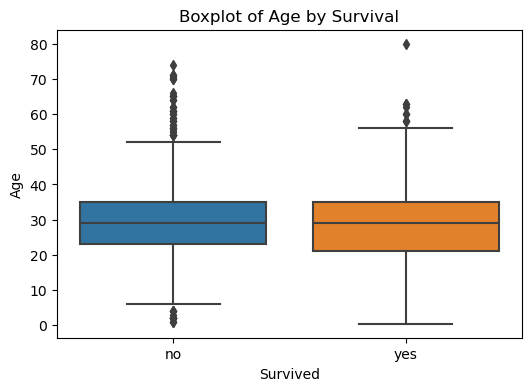

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived",y="Age",data=newTitanicData)
plt.title('Boxplot of Age by Survival')
plt.xlabel('Survived')
plt.xticks([0, 1], ["no", "yes"])
plt.ylabel('Age')
plt.show()


It can be seen that especially the older outlier individuals had the highest death rate.

Using the correlation between numerical column data and Survived, I determine which data has the most significant impact. Then, I visualize age, Pclass, and gender through graphs to see at a glance who, from which class, and which gender survived the most.

In [37]:
from scipy.stats import chi2_contingency

for col in ["Sex", "Embarked", "Name", "Ticket"]:
    x = chi2_contingency(pd.crosstab(newTitanicData[col], newTitanicData["Survived"]))[0]
    n = pd.crosstab(newTitanicData[col], newTitanicData["Survived"]).values.sum()
    cal = np.sqrt((x / (n * (min(pd.crosstab(newTitanicData[col], newTitanicData["Survived"]).shape) - 1))))
    print(f"{col:}: {cal:.1f}")


Sex: 0.5
Embarked: 0.2
Name: 1.0
Ticket: 0.9


And among the non-numeric column values, I used Cramers v to find out how much Embarked, Ticket, and Sex influence Survived. I used Cramers v instead of chi-squared to intuitively understand which non-numeric data is important at a glance. In fact, since most of the values in Name and Ticket are unique, they were not helpful for measuring Cramer's v, so I excluded them and only calculated it for the Sex and Embarked columns.

And from this, it can be seen that gender is important for survival among the non-numeric columns.

In [38]:
#Modeling and Question Answering

Upon seeing that the Survival column consisted solely of 0s and 1s, I immediately considered logistic regression as the appropriate model. Since logistic regression inherently outputs binary values (0 or 1), there was no need to transform the labels beforehand. Therefore, I applied the logistic regression model we learned in Assignment 3 for both training and prediction.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [40]:
forML = newTitanicData.drop(columns=["Name","Ticket","PassengerId"])
print(len(forML))
forML.head(5)

889


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,28.976328,0,0,8.4583,Q
1,1,2,male,29.092139,0,0,13.0000,S
2,1,3,female,28.944879,0,0,7.2250,C
3,0,3,male,28.944879,0,0,7.2250,C
4,1,3,female,28.961561,0,0,7.8792,Q


In [41]:
converted = forML[["Embarked","Sex"]].apply(lambda x: pd.factorize(x)[0]).values
forML[["Embarked","Sex"]] = converted
forML.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,28.976328,0,0,8.4583,0
1,1,2,0,29.092139,0,0,13.0000,1
2,1,3,1,28.944879,0,0,7.2250,2
3,0,3,0,28.944879,0,0,7.2250,2
4,1,3,1,28.961561,0,0,7.8792,0


The embarked and sex columns were replaced with 0, 1, and 2 to convert the categorical data into numerical values. Then, they were combined with the numeric data.

With a total of 889 data points, I split the dataset in a 6:1 ratio for efficient use — allocating two-thirds for training and one-third for testing.

In [42]:
from sympy import divisors #It was used to find the divisors of 889.

In [43]:
print(f"DIVISORS: {len(forML)}", divisors(len(forML)))

DIVISORS: 889 [1, 7, 127, 889]


In [44]:
 # As stated on Piazza, the total of 889 training data points was split into 2/3 for training and 1/3 for testing.
trainData = forML.loc[0:(889-127)]
testData = forML.loc[((889-127)+1):889]

In [45]:
print(len(trainData))
print(len(testData)) #And we also check whether the counts are correct.

763
126


First, we train the model using logistic regression. The training and test sets have already been split, and the model is now trained.

In [46]:
trainX = trainData.drop(columns="Survived")
trainY = trainData["Survived"]
testX = testData.drop(columns="Survived")
testY = testData["Survived"]

In [47]:
logiModel = LogisticRegression(random_state=50, max_iter=1000)
logiModel.fit(trainX, trainY)

LogisticRegression(max_iter=1000, random_state=50)

In [48]:
logiPrediction = logiModel.predict(testX)
print(f"Accuracy: {(accuracy_score(testY, logiPrediction)):}")

Accuracy: 0.8015873015873016


It is a decent result.

Next, I use KNN, which makes predictions based on distance calculations.
During model.predict, the prediction is made using distance calculations — a core characteristic of the KNN algorithm. It selects the k nearest neighbors based on proximity and determines the final prediction through a majority vote among their labels. I selected this algorithm because I found its approach interesting and it was covered in our class lectures.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(trainX, trainY) #After manually tuning the number of neighbors from 10 to 100, I found that 5 gave the highest accuracy.

KNeighborsClassifier()

In [51]:
knnPrediction = knnModel.predict(testX)
print(f"Accuracy: {(accuracy_score(testY, knnPrediction))}")

Accuracy: 0.753968253968254


Lastly, I use the Gradient Boosting Classifier, which we expect to achieve the highest accuracy.
The reason for this expectation is that, to my knowledge, the Gradient Boosting Classifier builds a strong model by combining multiple weak learners, and this process is likely to result in high accuracy. Therefore, I predicted that the Gradient Boosting Classifier would perform the best.

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbcModel = GradientBoostingClassifier()
gbcModel.fit(trainX,trainY)

GradientBoostingClassifier()

In [54]:
gbcPrediction = gbcModel.predict(testX)
print(f"Accuracy: {(accuracy_score(testY, gbcPrediction))}")

Accuracy: 0.8650793650793651


As I expected, Gradient Boosting Classifier indeed showed the highest accuracy.

I evaluate the three models I used, convert the results into a DataFrame, and then visualize them to more easily compare their performance.

In [55]:
logiReport = classification_report(testY, logiPrediction, output_dict = True, zero_division = 0)
logiReport.pop("accuracy", None)
knnReport = classification_report(testY, knnPrediction,output_dict = True, zero_division = 0)
knnReport.pop("accuracy", None)
gbcReport = classification_report(testY, gbcPrediction,output_dict = True, zero_division = 0)
gbcReport.pop("accuracy", None)
logiReDF = (pd.DataFrame(logiReport).T.reset_index().rename(columns={'index': 'class'}))
knnReDF = (pd.DataFrame(knnReport).T.reset_index().rename(columns={'index': 'class'}))
gbcReDF = (pd.DataFrame(gbcReport).T.reset_index().rename(columns={'index': 'class'}))

In [56]:
pl = logiReDF["precision"].mean()
rl = logiReDF["recall"].mean()
fl = logiReDF["f1-score"].mean()
pk = knnReDF["precision"].mean()
rk= knnReDF["recall"].mean()
fk= knnReDF["f1-score"].mean()
pg = gbcReDF["precision"].mean()
rg=gbcReDF["recall"].mean()
fg=logiReDF["f1-score"].mean()

I separated them into mean values and visualized the F1-score, precision, and recall individually to make the comparison more intuitive.

In [57]:
preAll = [pl,pk, pg]
recallAll = [rl,rk, rg]
f1All = [fl,fk, fg]
accAll = [(accuracy_score(testY, logiPrediction)),(accuracy_score(testY, knnPrediction)),(accuracy_score(testY, gbcPrediction))]
labels = ["Logistic Regression", "KNN", "Gradient Boosting"]

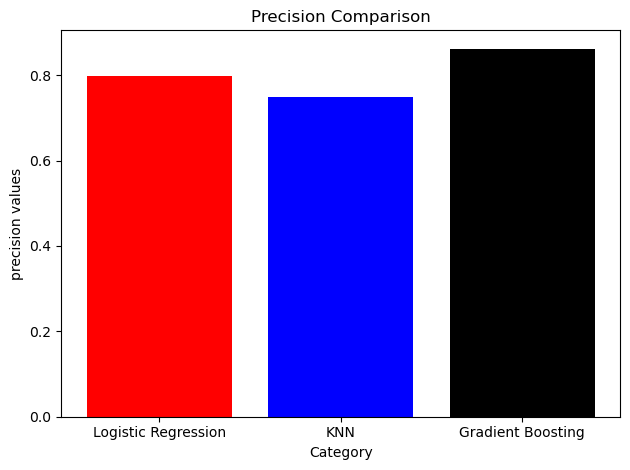

In [58]:
x = range(len(preAll)) # precision comparison
colors = ["red", "blue", "black"]
plt.bar(x, preAll, color = colors)
plt.xticks(x, labels)
plt.xlabel('Category')
plt.ylabel("precision values")
plt.title("Precision Comparison")
plt.tight_layout()
plt.show()

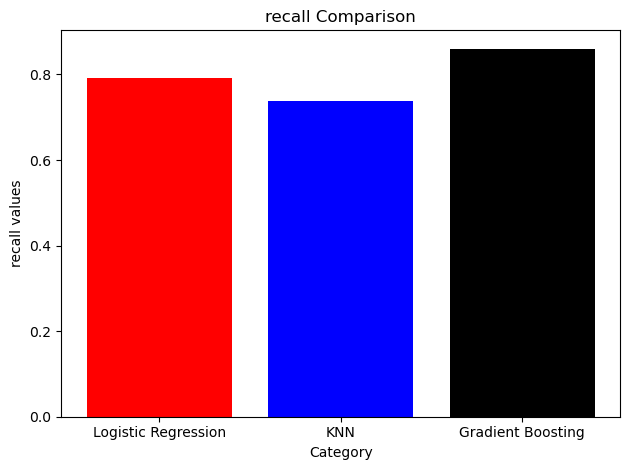

In [59]:
# recall comparison
plt.bar(x, recallAll, color = colors)
plt.xticks(x, labels)
plt.xlabel('Category')
plt.ylabel("recall values")
plt.title("recall Comparison")
plt.tight_layout()
plt.show()

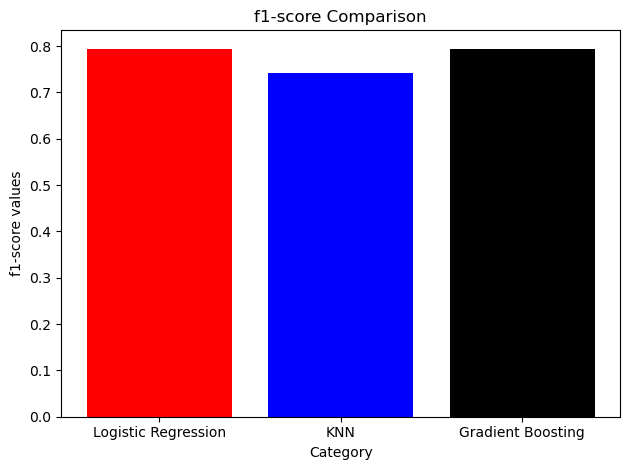

In [60]:
# f1-score comparison
plt.bar(x, f1All, color = colors)
plt.xticks(x, labels)
plt.xlabel('Category')
plt.ylabel("f1-score values")
plt.title("f1-score Comparison")
plt.tight_layout()
plt.show()

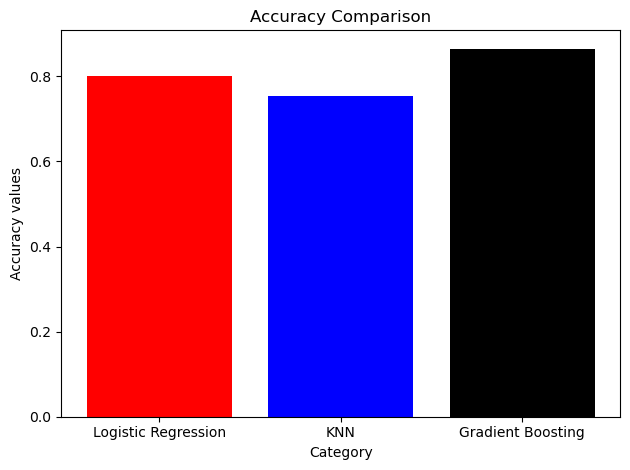

In [61]:
#accuracy comparison
plt.bar(x, accAll, color = colors)
plt.xticks(x, labels)
plt.xlabel('Category')
plt.ylabel("Accuracy values")
plt.title("Accuracy Comparison")
plt.tight_layout()
plt.show()

I calculate the mean of each F1-score through cross-validation and use visualization to intuitively compare the values.

In [62]:
from sklearn.model_selection import KFold, cross_val_score # for cross validation

In [63]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
models = [("Logistic Regression Model", logiModel),("KNN Model", knnModel),("GradientBoosting Model", gbcModel)]
crossVal = []

for name, model in models:
    scores = cross_val_score(model, trainX, trainY, cv=kf, scoring="f1")
    print(f"F1 scores mean for {name}: {scores.mean()}")
    crossVal.append(scores.mean())
    print()

F1 scores mean for Logistic Regression Model: 0.7150444549885715

F1 scores mean for KNN Model: 0.5568365277589915

F1 scores mean for GradientBoosting Model: 0.7466746343417598



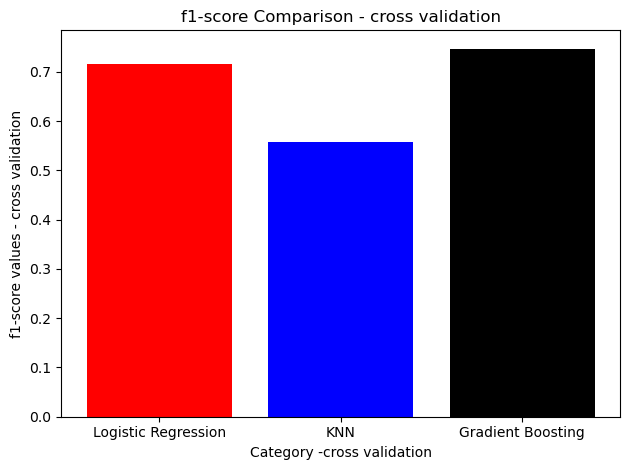

In [64]:
#performance comparison of cross validation
plt.bar(x, crossVal, color = colors)
plt.xticks(x, labels)
plt.xlabel('Category -cross validation')
plt.ylabel("f1-score values - cross validation")
plt.title("f1-score Comparison - cross validation")
plt.tight_layout()
plt.show()

The machine learning model that demonstrated the best overall performance was Gradient Boosting. It consistently achieved the highest scores across all evaluation metrics. This was followed by Logistic Regression, with K-Nearest Neighbors (KNN) performing the weakest among the three.

Among the features, gender and Pclass appear to have had the most significant impact on survival. In contrast, Embarked and Age showed similar patterns in their relationship with survival — the graphs for both suggest that passengers died at similar rates regardless of embarkation point, and that age mainly influenced survival due to elderly outliers who were less likely to survive. Anticipating this effect, I chose not to remove the elderly outliers during preprocessing.

As for gender, the results show that women had a higher survival rate than men. This may reflect evacuation protocols or social behavior during the disaster, where men prioritized helping women escape first.

Pclass also showed a strong correlation with survival. As seen in the correlation analysis, passengers in higher classes had a significantly higher chance of survival, likely due to being prioritized during the evacuation process.